#  *Logistic Regression Lab 2: Diabetes Prediction*
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------


# Table of Contents
--------------------------------------------------------
1. [Introduction](#Introduction)
2. [Problem Statement](#Problem-Statement)
3. [Data Import and Exploration](#Data-Import-and-Exploration)
4. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
    - [Visualizations](#Visualizations)
5. [Data Preprocessing](#Data-Preprocessing)
6. [Feature Engineering](#Feature-Engineering)
7. [Modelling](#Modelling)
    - [Data Splitting](#Data-Splitting)
    - [Model Building](#Model-Building)
8. [Model Evaluation](#Model-Evaluation)
    - [Model Metrics](#Model-Metrics)
    - [Hyperparameter Tuning](#Hyperparameter-Tuning)
9. [Model Explainability and Interpretation](#Model-Explainability-and-Interpretation)
    - [Feature Importance](#Feature-Importance)
10. [Conclusion](#Conclusion)
11. [References](#References)



# 1. Introduction

Diabetes mellitus is simply known as diabetes is a metabolic disease where there are elevated blood sugar levels over a prolonged period of time (WHO, 2023). 

This dataset is related to diabetes diagnosis and has been made available by the “National Institute of Diabetes and Digestive and Kidney Diseases as part of the Pima Indians Diabetes Database". The patient records in the dataset are from females aged 21 and above from the Pima Indian heritage group in North America. There are eight features in the dataset with a target feature, ‘Outcomes’, which is the diabetes diagnosis of the patients, and 768 patients in total. 
The features are the following (Victor Chang, 2022): 
•	Number of times pregnant (Pregnancies)
•	Plasma glucose concentration (Glucose)
•	Diastolic blood pressure
•	Triceps skin fold thickness (Skin Thickness)
•	2-hr serum insulin (Insulin)
•	Body mass index (BMI)
•	Diabetes pedigree function
•	Age 
•	The diagnosis in binary form (Outcome)


# 2. Problem Statement

The objective of this notebook is to explore and analyse the diabestes dataset to find any patterns in the data that can be used to explain being diagnosed with diabetes. Logistic regression will be the model used to make predictions of diabetes diagnosis based on the features used. 

# 3. Data Import and Exploration

In [1]:
#Read in libraries
import pandas  as pd #Data manipulation
import numpy as np  #Data manipulation
import matplotlib.pyplot as plt  #Visualization
import seaborn as sns  #Visualization

from sklearn.preprocessing import RobustScaler  #Feature Normalisation

from sklearn.model_selection import train_test_split  #Model Training
from sklearn.linear_model import LogisticRegression  #Selected Model
from sklearn.model_selection import cross_val_score 

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report  #Model Metrics

%matplotlib inline

In [2]:
df = pd.read_csv(f"""diabetes2.csv""")

In [3]:
df.head()  #preview

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 4. Exploratory Data Analysis (EDA)

### Data Overview:

In [4]:
df.shape

(768, 9)

There are 768 Rows and 9 Columns.

## data type

In [5]:
df.dtypes  #no conversion needed , everything is numeric , no strings

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Data Summary

In [6]:
#Displaying the statistical summary of the features;
summary_1 =df.iloc[:, :-1].describe()
summary_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Visualizations

## Univariate Analysis: Exploring Distribution

### Outcome Distribution

C:\Users\matlo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

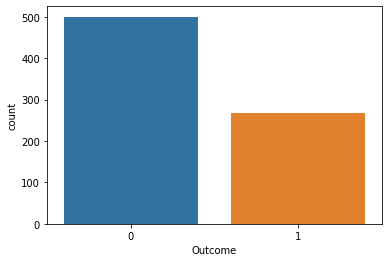

In [7]:
#Target distribution
sns.countplot('Outcome',data=df)

In [8]:
value_counts = df['Outcome'].value_counts()
value_counts

0    500
1    268
Name: Outcome, dtype: int64

The classes of the outcome are relatively imbalanced as the percentage of diabetes diagnosis is 65.1% and that of no diabetes is 34.9%

**Explore the average of each feature relative to the outcome:**

In [9]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


###                _Histograms_

Create a visualization of the features to see how the data is distributed:

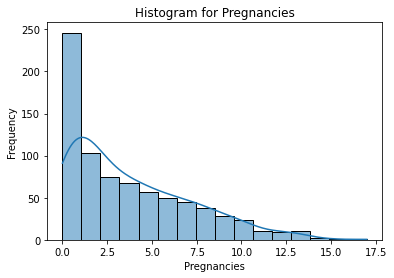

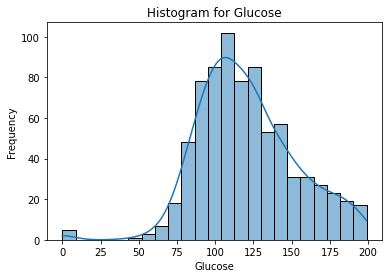

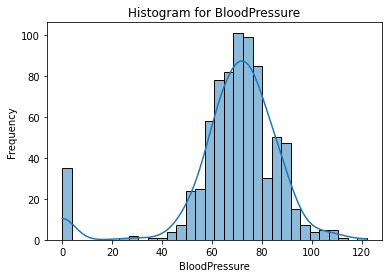

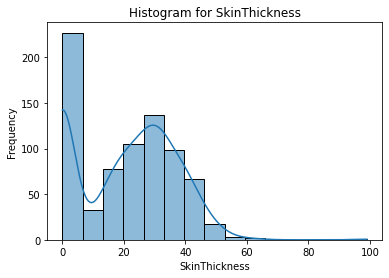

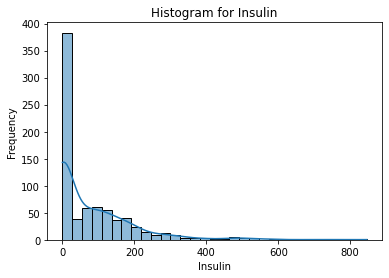

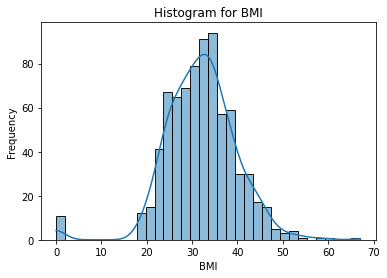

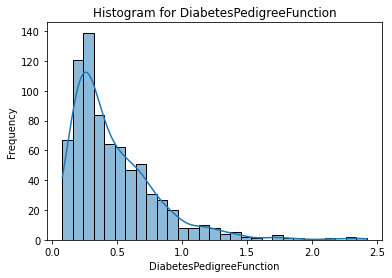

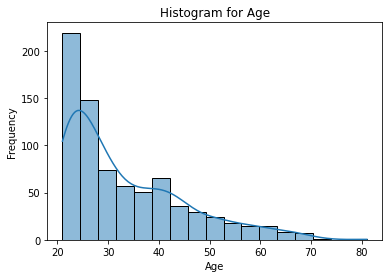

In [10]:
features = df.columns[:-1]  # Exclude the 'Outcome' column

for feature in features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


###    _Boxplots:_

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

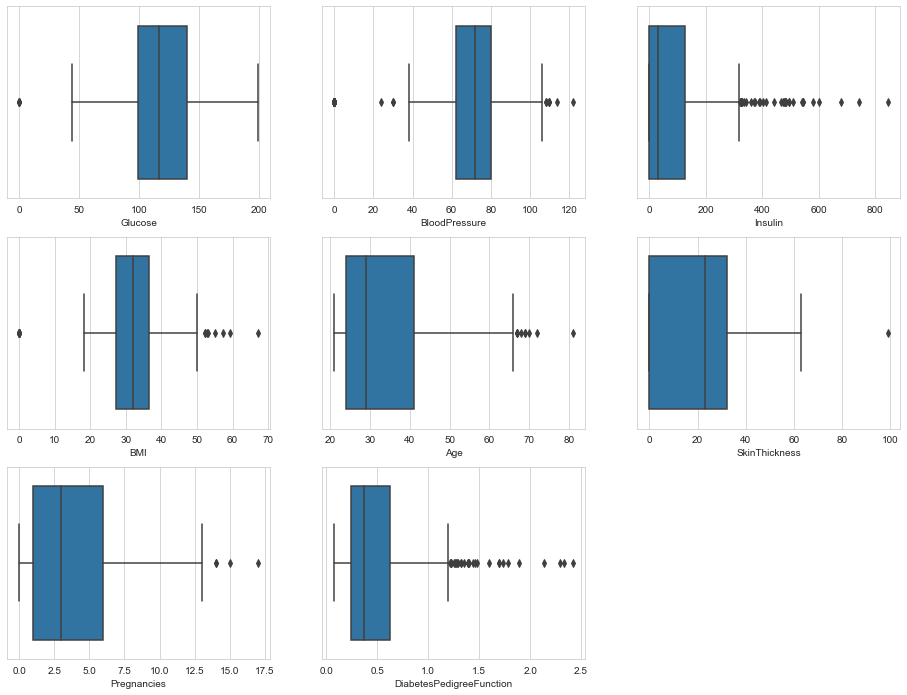

In [11]:
#Use box plot to explain the above data distribution per variable 
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

## Bivariate Analysis:

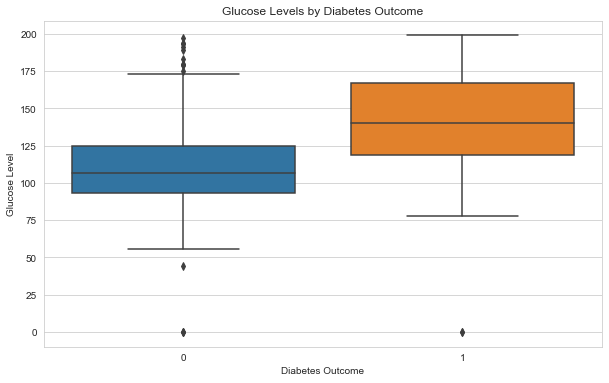

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose Level')
plt.title('Glucose Levels by Diabetes Outcome')
plt.show()

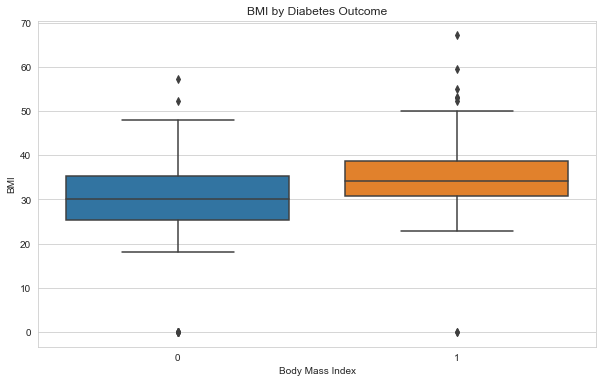

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.xlabel('Body Mass Index')
plt.title('BMI by Diabetes Outcome')
plt.show()

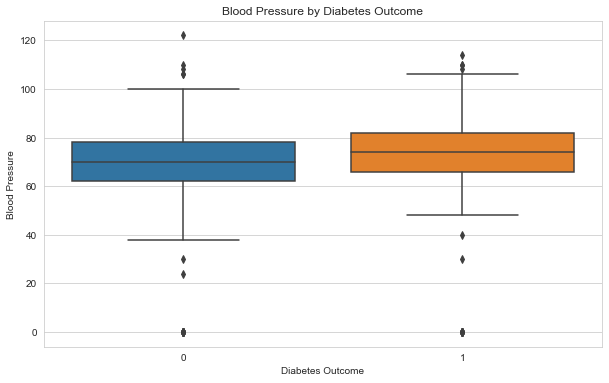

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Blood Pressure')
plt.title('Blood Pressure by Diabetes Outcome')
plt.show()

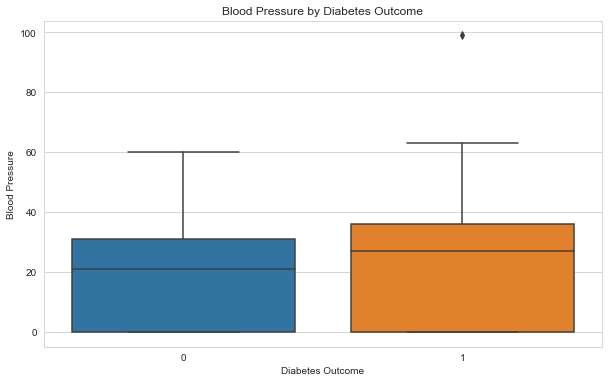

In [15]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='SkinThickness', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Blood Pressure')
plt.title('Blood Pressure by Diabetes Outcome')
plt.show()

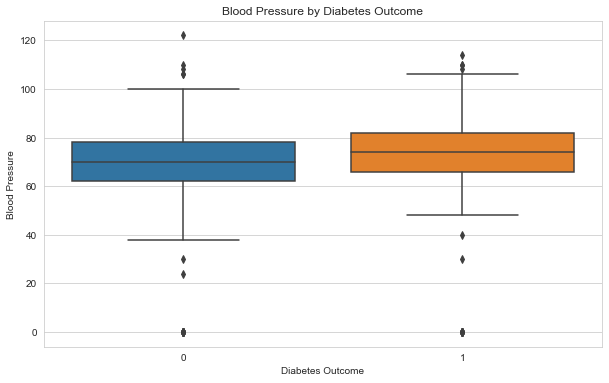

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Blood Pressure')
plt.title('Blood Pressure by Diabetes Outcome')
plt.show()

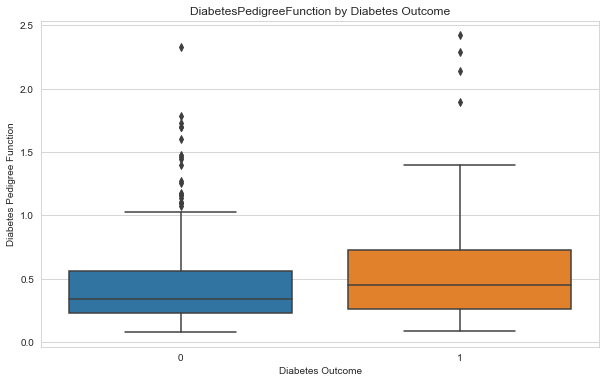

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Diabetes Pedigree Function')
plt.title('DiabetesPedigreeFunction by Diabetes Outcome')
plt.show()

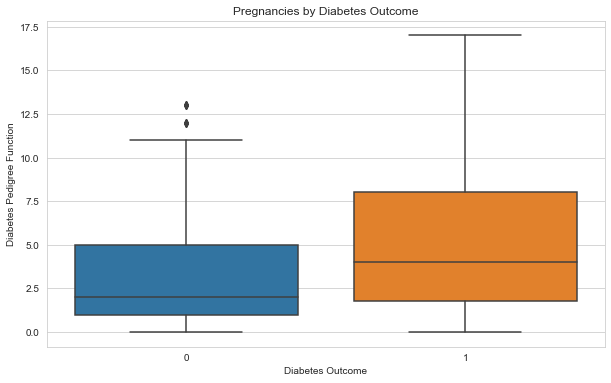

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Diabetes Pedigree Function')
plt.title('Pregnancies by Diabetes Outcome')
plt.show()

Higher Glucose levels, DiabetesPedigreeFunction and number of Pregnancies seems to have more diabetes diagnosis than other feature. This can further be explored

## Bar Plots

### *Analysing the Number of Pregnancies:*

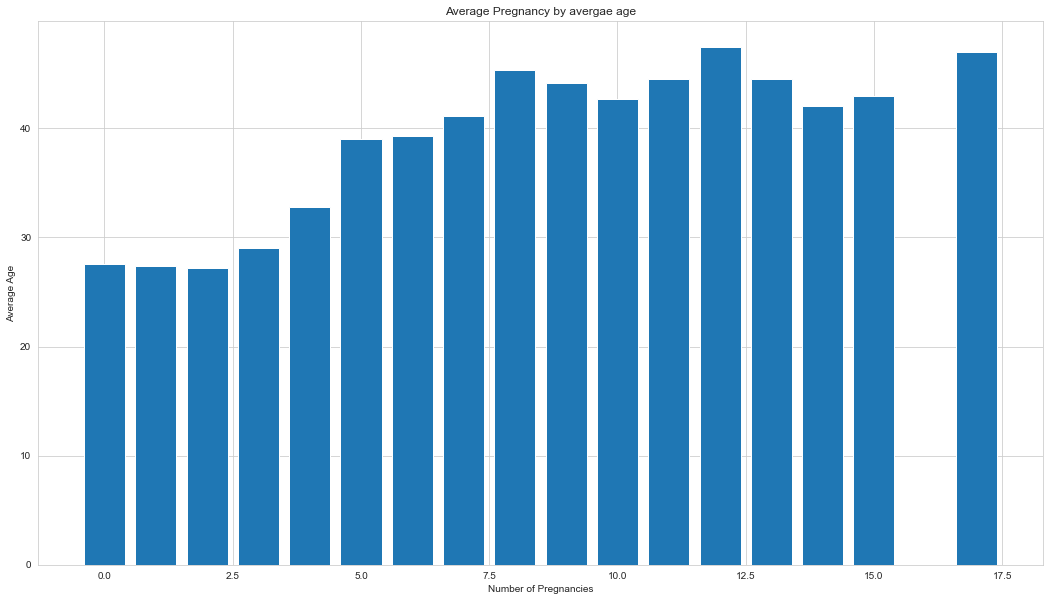

In [19]:
# Calculate the average age for each unique number of pregnancies
average_age_per_pregnancy = df.groupby('Pregnancies')['Age'].mean().sort_index()

# Create the bar plot
plt.figure(figsize=(18, 10))
plt.bar(average_age_per_pregnancy.index, average_age_per_pregnancy.values)
plt.xlabel('Number of Pregnancies')
plt.ylabel('Average Age')
plt.title('Average Pregnancy by avergae age')
plt.show()


Women below the age of 30 on average have less than 3 pregnancies while the more older women on average have been pregnant more times.

In [20]:
#Explore how the number of pregancies relate to diabetes diagnosis:

cross_tab = pd.crosstab(df['Pregnancies'], df['Outcome'])
print(cross_tab)

Outcome        0   1
Pregnancies         
0             73  38
1            106  29
2             84  19
3             48  27
4             45  23
5             36  21
6             34  16
7             20  25
8             16  22
9             10  18
10            14  10
11             4   7
12             5   4
13             5   5
14             0   2
15             0   1
17             0   1


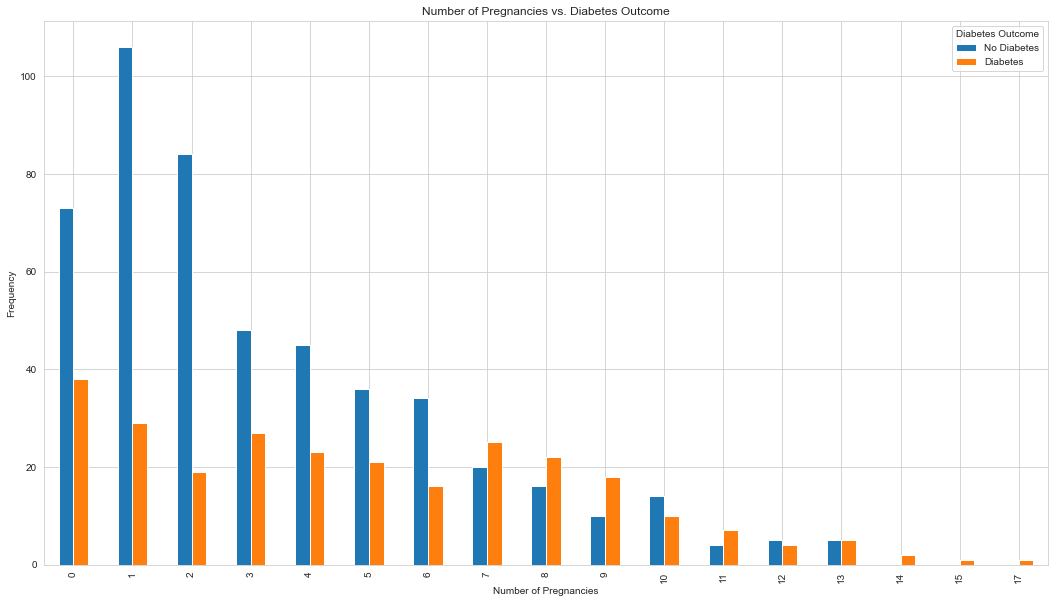

In [21]:
# Visualize using side bar plot:
cross_tab.plot(kind='bar', figsize=(18, 10))
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')
plt.title('Number of Pregnancies vs. Diabetes Outcome')
plt.legend(title='Diabetes Outcome', labels=['No Diabetes', 'Diabetes'])

According o the plot, the more pregnancies someone has had, the more they are likely to be diagnosed with diabetes. This might be due to the increased risk of gestational diabetes.

### *Analysing the BMI:*

### *Analysing the Glucose Levels:*

In [22]:
# Bin glucose levels into categories
bins = [0, 100, 125, 140, 200]
labels_gluc = ['Normal Fasting', 'Normal', 'High', 'Very High']
df['Glucose_bin'] = pd.cut(df['Glucose'], bins=bins, labels=labels_gluc)

# Create a cross-tabulation
cross_tab_gluc = pd.crosstab(df['Glucose_bin'], df['Outcome'])
print(cross_tab)

Outcome        0   1
Pregnancies         
0             73  38
1            106  29
2             84  19
3             48  27
4             45  23
5             36  21
6             34  16
7             20  25
8             16  22
9             10  18
10            14  10
11             4   7
12             5   4
13             5   5
14             0   2
15             0   1
17             0   1


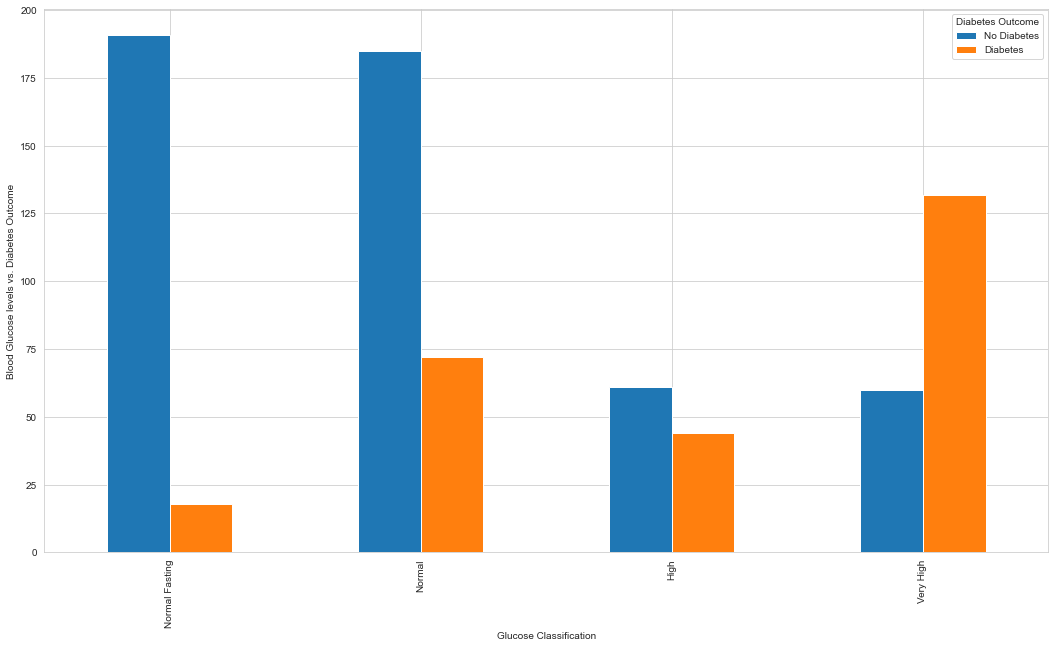

In [23]:
cross_tab_gluc.plot(kind= 'bar', figsize = (18,10))
plt.xlabel('Glucose Classification')
plt.ylabel('Blood Glucose levels vs. Diabetes Outcome')
plt.legend(title='Diabetes Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()

In [24]:
df.groupby('DiabetesPedigreeFunction').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
DiabetesPedigreeFunction,,,,,,,,
0.078,0.0,102.0,52.0,0.0,0.0,25.10,21.0,0.0
0.084,6.0,87.0,80.0,0.0,0.0,23.20,32.0,0.0
0.085,4.0,91.0,66.0,24.5,63.0,29.65,34.0,0.0
0.088,1.5,149.0,67.0,10.0,70.0,35.30,34.5,0.5
0.089,0.0,117.0,80.0,31.0,53.0,45.20,24.0,0.0
...,...,...,...,...,...,...,...,...
1.893,0.0,180.0,66.0,39.0,0.0,42.00,25.0,1.0
2.137,3.0,173.0,82.0,48.0,465.0,38.40,25.0,1.0
2.288,0.0,137.0,40.0,35.0,168.0,43.10,33.0,1.0


## Correlation Analysis

In [25]:
df1=df.iloc[:, :-1]
correlation_matrix=df1.corr()
correlation_matrix


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


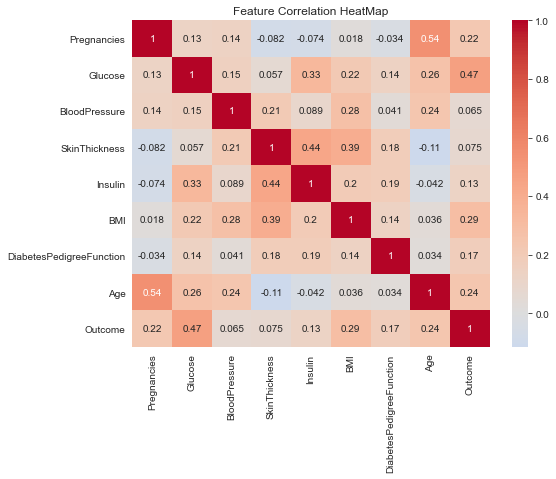

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation HeatMap')
plt.show()

All the features have a correlation coeffecient less than 0,6, therefore it is safe to exclude multicollinearity of features and therefore, no grouping or binning of features will be done in the Feature Engineering section. 

# 5. Data Preprocessing

## Missing values

In [27]:
#missing values
missings=df.isna()
missings.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Glucose_bin                 5
dtype: int64

There are no missing values in the dataset.

### Assess Duplicates:

In [28]:
duplicates = df.duplicated()

# Show duplicate rows
print("Duplicate Rows:")
print(df[duplicates])

Duplicate Rows:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome, Glucose_bin]
Index: []


No duplicates observed

### Zero Values:

In [29]:
#variables such as (BloodPressure, GLUCOSE,BMI,SKINTHICKENSS AND AGE)are not humanly possible to be zero
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [30]:
columns_with_0 = ['BloodPressure', 'Glucose', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_with_0:
    mean_value = df[df[col] != 0][col].mean()          #Calc mean of the columns excluding zero
    df[col].replace(0, mean_value, inplace=True)

In [31]:
#verify that data is filled
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

0
0
0
0
0


# 6. Feature Engineering 

**Remove the columns with strings, i.e the bin column from the EDA section:**

In [32]:
feature_columns = df.columns.difference(['Glucose_bin', 'Outcome'])  # Exclude 'Glucose_bin' and 'Outcome'


X = df[feature_columns]  # Independent variables
y = df['Outcome']  # Dependent variable

# 7. Modelling

## Model Training

### Train test split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

*Standardize the Features:*

Standardizing after the train-test split is good practise to avoid data leakage, or to ensure that the model gets unseen test data.

In [34]:
# Scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Model fitting and prediction
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# 8. Model Evaluation

## Model Metrics

In [36]:
#Calculate the accuracy, gini score and Area under the curve



# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]
# Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)





AUC: 0.5


## Cross Validation

In [37]:
#cross validation will help estimate how well the model will generalize to new unseen data

# Initialize the logistic regression model
model = LogisticRegression()

# Perform cross-validation
num_folds = 5  # Number of cross-validation folds
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=num_folds, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-Validation Scores: [0.78861789 0.77235772 0.75609756 0.70731707 0.81967213]
Mean CV Score: 0.768812475009996
Standard Deviation of CV Scores: 0.037242129927476206


Fit the model and determine its metrics:

## Confusion Matrix

In [38]:
# Print confusion matrix and classification report


#Plot the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


# Create a heatmap-style confusion matrix plot

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

#the classification report:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Hyperparameter Tuning

# 9. Model Explainablity 

## Feature Importance

In [ ]:
X_train.columns


In [ ]:
X_train_fn = X_train
X_test_fn = X_test
coefficients = model.coef_[0]
feature_names = X_train.columns.tolist()

In [ ]:
# Combining feature names with their corresponding coefficients
feature_coefficients = list(zip(feature_names, coefficients))
# Printing feature coefficients
for feature, coef in feature_coefficients:
    print(f"{feature}: {coef}")

In [ ]:
plt.figure(figsize=(10, 6)) 
plt.bar(feature_names, coefficients)
plt.xticks(rotation=90, ha="right") 
plt.xlabel("Feature") 
plt.ylabel("Coefficient")
plt.title("Feature Coefficients (Importance)")
plt.tight_layout()
plt.show()

# 10. Conclusion

# 11. References